# Milestone 1

by Handoko Pramulyo - Batch 14 | handoko.pramulyo.14@gmail.com
***

***Assignment problem*** No 4 | CEO toko online "The Look" mencurigai bahwa ada yang tidak beres dari sistem penjualan di tokonya, dari performa penjualan produk, pengiriman barang, dsb. Mohon bantu ungkapkan apakah bermasalah atau tidak dari sistem penjualan di platformnya. Gunakan dataset thelook_ecommerce di Google Cloud Platform BigQuery.

# A. Analyzing Required Dataset

***Permasalahan*** : ```Mengetahui kondisi sales & operational di Toko Online The Look```

Berdasarkan hasil pengamatan data dan kekhawatiran dari CEO, maka focus dari persoalan biasanya datang dari ***keluhan customer*** (complain, warranty, waktu, dll). Pada case in, tools 8 Waste DOWN TIME akan digunakan (instead of 5W 1H) untuk menjabarkan possible cause persoalan. ***DOWN TIME*** sendiri element-nya adalah,<br>

1. Defect (berapa byk barang yg defect dan return? berapa kerugiannya? apakah signifikan atau tidak?)
2. Overproduction (berapa banyak supply product bagi customer? apa saja product-nya)
3. Waiting (berapa lama rentan waktu yang dibutuhkan untuk setiap proses?)
4. Unused Talent/customer (seperti apa demografi dari pembeli? melalui apa pembeli akses produk toko?)
5. Transportation (dimana saja lokasi distribution center dan negara pembeli?)
6. Inventory (apakah semua inventory terkirim sampai deliver done kepada customer?)
7. Motion (unproductive distribution center?)
8. dan Extraprocessing (too much to give)<br>

Dari breakdown tersebut, maka problem paling relefan vs ketersediaan dataset (BigQuery) salah satunya adalah data return product, date, number of item, sales proces per item, cost of delivery, product category, all data related to buyers/users (age, gender, negara, trafic resource), lokasi distribusi center, proses dari business (status) dll.

# B. Database Query

Berdasarkan dari analisis yang sudah dibuat pada Bagian A, maka Query yang dilakukan adalah sebagai berikut.

In [332]:
# EXPORT DATA OPTIONS(
#   uri='gs://bigquery_export_hans/milestone_*.csv',
#   format='CSV',
#   overwrite=true,
#   header=true,
#   field_delimiter=',') AS

# select order_items.status, order_items.created_at, order_items.shipped_at, order_items.delivered_at,
# order_items.returned_at, products.cost, orders.num_of_item, order_items.sale_price, users.age,
# users.gender, users.traffic_source, users.country, products.category, dc.name

# from `bigquery-public-data.thelook_ecommerce.order_items` as order_items
# join `bigquery-public-data.thelook_ecommerce.users` as users on order_items.user_id = users.id
# join `bigquery-public-data.thelook_ecommerce.products` as products on order_items.product_id = products.id
# join `bigquery-public-data.thelook_ecommerce.orders` as orders on order_items.order_id = orders.order_id
# join `bigquery-public-data.thelook_ecommerce.distribution_centers` as dc on products.distribution_center_id = dc.id

# B. Load library & File

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from numpy import percentile

In [334]:
# Load CSV Data, define austin_waste dataframe with df
df = pd.read_csv('h8dsft_P0Milestone1_handoko_pramulyo.csv')

In [335]:
df.head()

,status,created_at,cost,num_of_item,sale_price,age,gender,traffic_source,country,category,name
0,Shipped,2021-08-13 07:29:04 UTC,1.1075,2,2.5,50,F,Search,China,Accessories,Houston TX
1,Shipped,2022-05-22 07:47:03 UTC,1.1075,1,2.5,27,F,Search,United States,Accessories,Houston TX
2,Complete,2021-08-23 22:42:48 UTC,1.1075,3,2.5,25,F,Organic,China,Accessories,Houston TX
3,Complete,2021-05-25 01:58:27 UTC,1.1075,4,2.5,56,F,Organic,China,Accessories,Houston TX
4,Processing,2022-03-29 02:16:19 UTC,1.1075,1,2.5,54,F,Display,United States,Accessories,Houston TX


In [336]:
df.tail()

,status,created_at,cost,num_of_item,sale_price,age,gender,traffic_source,country,category,name
181337,Processing,2022-02-16 01:20:22 UTC,5.67588,2,9.32,19,F,Organic,United States,Tops & Tees,Charleston SC
181338,Processing,2020-10-21 03:51:19 UTC,5.67588,1,9.32,70,F,Search,Spain,Tops & Tees,Charleston SC
181339,Complete,2022-03-23 02:30:14 UTC,4.37972,1,9.82,35,F,Email,China,Dresses,Charleston SC
181340,Cancelled,2019-05-23 01:55:25 UTC,4.37972,1,9.82,47,F,Search,South Korea,Dresses,Charleston SC
181341,Processing,2021-08-21 02:34:23 UTC,4.37972,4,9.82,57,F,Facebook,China,Dresses,Charleston SC


In [337]:
df['created_at'] = df['created_at'].astype('datetime64[ns]')
df = df.replace('Fashion Hoodies & Sweatshirts','Hoodies & Sweatshirts')
df = df.replace('Port Authority of New York/New Jersey NY/NJ','Port New York/NJ')

In [338]:
# Define new category of Customer Age into Generation
temp = []

for i in range(len(df)):
    if df['age'][i] <21:
        temp.append('0-13 Gen Alpha ')
    elif df['age'][i] <29:
        temp.append('14-28 Gen Z')
    elif df['age'][i] <37:
        temp.append('29-45 Gen Y')
    elif df['age'][i] <46:
        temp.append('46-57 Gen X')
    else:
        temp.append('58-76 Gen BB')

df['age_group']=temp

***List of plot style*** | Solarize_Light2, _classic_test_patch, bmh, classic, dark_background, fast, fivethirtyeight, ggplot, grayscale, seaborn, seaborn-bright, seaborn-colorblind, seaborn-dark, seaborn-dark-palette, seaborn-darkgrid, seaborn-deep, seaborn-muted, seaborn-notebook, seaborn-paper, seaborn-pastel, seaborn-poster, seaborn-talk, seaborn-ticks, seaborn-white, seaborn-whitegrid, tableau-colorblind10

In [339]:
# Define plot style
plt.style.use('ggplot')

# C. Data Cleaning

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181342 entries, 0 to 181341
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          181342 non-null  object        
 1   created_at      181342 non-null  datetime64[ns]
 2   cost            181342 non-null  float64       
 3   num_of_item     181342 non-null  int64         
 4   sale_price      181342 non-null  float64       
 5   age             181342 non-null  int64         
 6   gender          181342 non-null  object        
 7   traffic_source  181342 non-null  object        
 8   country         181342 non-null  object        
 9   category        181342 non-null  object        
 10  name            181342 non-null  object        
 11  age_group       181342 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 16.6+ MB


Tidak ditemukan nulled value, sehingga proses outliers removal bisa langsung dilakukan tanpa perlu cleaning data, seperti dropna dan fillna (dengan median), dst

# D. Data Visualization

## D1. Order Status by Generation

In [341]:
df_status_gen = df.copy()

In [342]:
df_status_gen_matrix = pd.crosstab(df_status_gen['status'],df_status_gen['age_group'])
df_status_gen_matrix['total']=df_status_gen_matrix.sum(axis=1) # add the row wise sum
df_status_gen_matrix.sort_values('total', inplace=True) # sort
df_status_gen_matrix = df_status_gen_matrix.drop(['total'], axis = 1)
df_status_gen_matrix

age_group,0-13 Gen Alpha,14-28 Gen Z,29-45 Gen Y,46-57 Gen X,58-76 Gen BB
status,,,,,
Returned,2667,2618,2558,2800,7645
Cancelled,4041,3742,3534,4017,11547
Processing,5445,5116,5005,5491,15102
Complete,6965,6105,6180,6909,19184
Shipped,8330,7410,7408,8378,23145


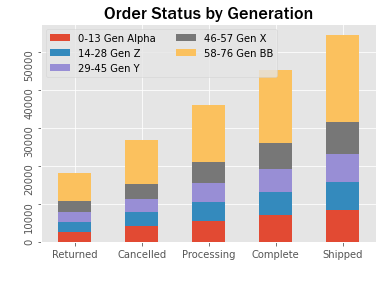

In [343]:
df_status_gen_matrix.plot(kind='bar',stacked=True)
# Adding Legend
plt.legend(["0-13 Gen Alpha", "14-28 Gen Z", "29-45 Gen Y", "46-57 Gen X", "58-76 Gen BB"], loc ="upper left", ncol=2)
# Adding Title
plt.title('Order Status by Generation', fontname='Franklin Gothic Medium', fontsize=18)
# Adding label on the y-axis
plt.xlabel(' ')
plt.ylabel(' ')
# Adjuts label rotation on the y-axis
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.show()

***Insight*** | Dari hasil counting kesulurah data, product yang masih dalam proses pengiriman (Shipped dan dalam proses Delivered/complete) berada pada rank 1. Di antara data Shipped tersebut, ternyata sebagai besarnya adalah user/customer yang memesan produk di umur 58 tahun up (Generasi Baby Boomers). Adapun jumlah product yang returned berada pada rank paling rendah, namun meskipun demikian, tetap saja user dengan generasai BB yang paling dirugikan.

## D2. Product Category by Gender

In [344]:
df_category_gender = df.copy()

In [345]:
df_category_gender_matrix = pd.crosstab(df_category_gender['category'],df_category_gender['gender'])
df_category_gender_matrix['total']=df_category_gender_matrix.sum(axis=1) # add the row wise sum
df_category_gender_matrix.sort_values('total', inplace=True) # sort
df_category_gender_matrix = df_category_gender_matrix.drop(['total'], axis = 1)
df_category_gender_matrix.head()

gender,F,M
category,,
Clothing Sets,197,0
Jumpsuits & Rompers,985,0
Suits,1067,0
Skirts,2055,0
Blazers & Jackets,3144,0


In [346]:
# df_category_gender_matrix.to_csv("df_category_gender_matrix.csv")

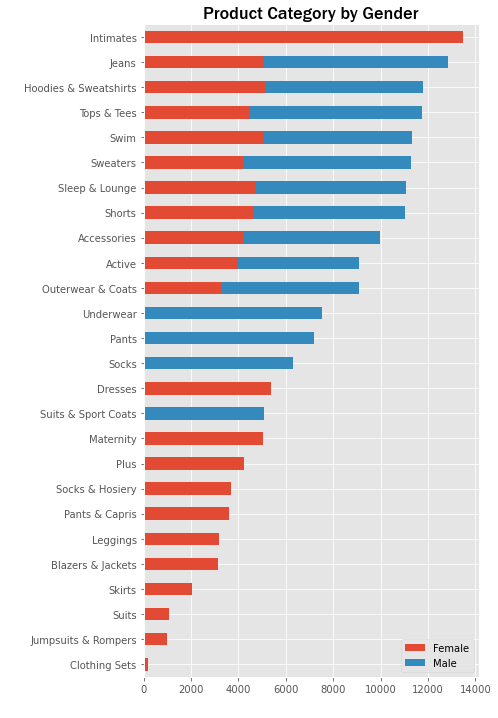

In [347]:
df_category_gender_matrix[['F','M']].plot(kind='barh',stacked=True, figsize=(6,12))

# Adding Legend
plt.legend(["Female", "Male"], loc ="lower right", ncol=1)
# Adding Title
plt.title('Product Category by Gender', fontname='Franklin Gothic Medium', fontsize=18)
# Adding label on the y-axis
plt.xlabel(' ')
plt.ylabel(' ')
# Adjuts label rotation on the y-axis
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

***insight*** | Dari sekian banyak produk yang dijual oleh Toko ini, TOP 5 product terlaris diantaranya adalah produk dengan kategori intimates (yang didominasi oleh user dengan gender wanita 'female'), jeans, Hoodies, Tops, dan Swim. Produk yang didominasi oleh pria diantaranya secara berurutan dari yang terbanyak adalah underware, pants, dan socks, dan Suits. Sedangkan produk yang didominiasi oleh wanita selain kategori intimates adalah maternity, plus, dst sampai dengan cloting sets.

## D3. Buyers Country by Order Status

In [348]:
df_country_gen = df.copy()

In [349]:
df_country_gen_matrix = pd.crosstab(df_country_gen['country'],df_country_gen['status'])
df_country_gen_matrix['total']=df_country_gen_matrix.sum(axis=1) # add the row wise sum
df_country_gen_matrix.sort_values('total', inplace=True) # sort
df_country_gen_matrix = df_country_gen_matrix.drop(['total'], axis = 1)
df_country_gen_matrix.head()

status,Cancelled,Complete,Processing,Returned,Shipped
country,,,,,
Deutschland,0,0,0,0,1
Austria,0,3,0,1,1
Colombia,5,1,5,2,2
España,2,1,8,1,5
Poland,76,103,93,53,153


In [350]:
# df_country_gen_matrix.to_csv("df_country_gen_matrix.csv")

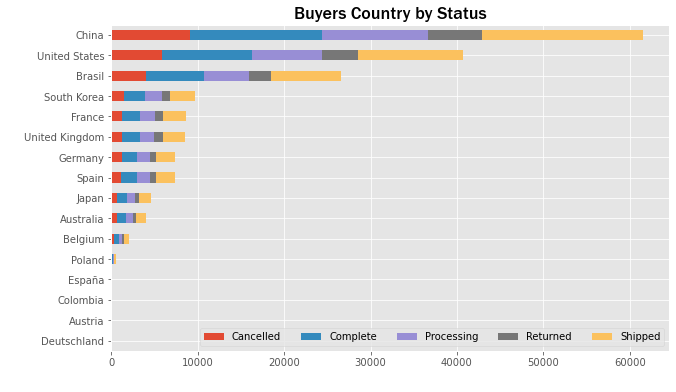

In [351]:
df_country_gen_matrix[["Cancelled", "Complete", "Processing", "Returned","Shipped"]].plot(kind='barh',stacked=True, figsize=(10,6))

# Adding Legend
plt.legend(["Cancelled", "Complete", "Processing", "Returned","Shipped"], loc ="lower right", ncol=5)
# Adding Title
plt.title('Buyers Country by Status', fontname='Franklin Gothic Medium', fontsize=18)
# Adding label on the y-axis
plt.xlabel(' ')
plt.ylabel(' ')
# Adjuts label rotation on the y-axis
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

***insight*** | Dari beberapa negara user/pembeli, TOP 3 negera yang paling sering melakukan transaksi diantaranya adalah China, US, dan Brasil. Sedangkan Negara yang tercatat paling rendah adalah Deutsc, Austria, Colombia, dan Espana. China tampak memimpin dalam semua count status pengiriman, the most cancelled, complete, dst. CEO harus mulai mem-prioritaskan ketiga negara ini, baik secara service, duration, dll yang lebih baik sehingga profits yang dihasilkan bisa lebih baik sekaligus mengurangi jumlah cost akibat product yg berstatus return.

## D4. Distribution center by traffic source

In [352]:
df_dc = df.copy()

In [353]:
df_dc_matrix = pd.crosstab(df_dc['name'],df_dc['traffic_source'])
df_dc_matrix['total']=df_dc_matrix.sum(axis=1) # add the row wise sum
df_dc_matrix.sort_values('total', inplace=True) # sort
df_dc_matrix = df_dc_matrix.drop(['total'], axis = 1)
df_dc_matrix.head()

traffic_source,Display,Email,Facebook,Organic,Search
name,,,,,
Savannah GA,506,595,716,1710,8429
New Orleans LA,526,657,772,1994,9186
Port New York/NJ,664,791,949,2437,11287
Philadelphia PA,653,858,1026,2465,11738
Charleston SC,645,854,1017,2519,11737


In [354]:
# df_dc_matrix.to_csv("df_dc_matrix.csv")

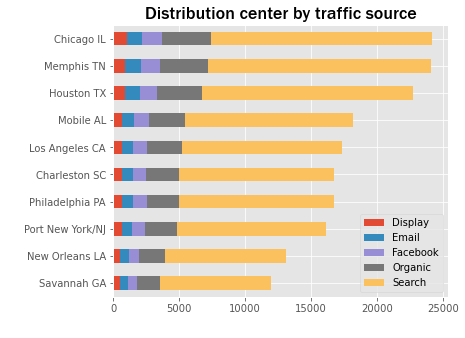

In [355]:
df_dc_matrix[["Display", "Email", "Facebook", "Organic", "Search"]].plot(kind='barh',stacked=True, figsize=(6,5))

# Adding Legend
plt.legend(["Display", "Email", "Facebook", "Organic", "Search"], loc ="lower right", ncol=1)
# Adding Title
plt.title('Distribution center by traffic source', fontname='Franklin Gothic Medium', fontsize=18)
# Adding label on the y-axis
plt.xlabel(' ')
plt.ylabel(' ')
# Adjuts label rotation on the y-axis
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

***insight*** | Bisa dilihat bahwa lokasi dsitribusi center tersibuk adalah Chicago IL dengan jumlah proses produk terbanyak (baik pada saat masuk ke sistem atau saat sudah pengiriman). Kemudian dilanjutkan dengan Memphis TN, Houston TX dst. Dari semua lokasi distirbution center, tampak jelas bahwa kebanyakan user/pembeli lebih banyak melakukan transaksi pembelian melalui searching produk langsung via website toko online. Kemudian disusul dari sumber organic (situs search engine seperti Google, yahoo, dan Bing), dst. Tercatat bahwa user lebih sedikit mengakses produk yang dijual via display, atau melalui iklan yang berada diluar website resmi toko.

# E. Descriptve Stat : Sales Performance

In [356]:
df_stat = df.copy()

In [357]:
df_stat['income'] = df_stat['num_of_item']*df_stat['sale_price']
df_stat['profits'] = df_stat['income']-df_stat['cost']
df_stat = df_stat[df_stat['status']=='Returned']
df_stat = df_stat.drop(['income','cost','age','gender','traffic_source','country','category','name','age_group','num_of_item','sale_price'], axis = 1)
df_stat.head()

,status,created_at,profits
10,Returned,2020-03-30 07:01:47,1.731
36,Returned,2021-11-18 09:44:51,12.628
37,Returned,2021-08-16 12:01:58,8.862
61,Returned,2021-09-07 13:03:55,5.780
112,Returned,2020-12-31 16:46:59,7.765


In [358]:
# df_stat.to_csv("df_stat.csv")

In [359]:
## Calculate quartiles
quartiles = percentile(df_stat['profits'], [25, 50, 75])

print ('Count: ' + str(df_stat['profits'].count()))
print ('Min: ' + str(df_stat['profits'].min()))
print ('Max: ' + str(df_stat['profits'].max()))
print ('Std: ' + str(df_stat['profits'].std()))
print ('-'*20)
print ('Mean: ' + str(df_stat['profits'].mean()))
print('Q1: %.3f' % quartiles[0])
print('Q2: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])


Count: 18288
Min: 0.8652299957279861
Max: 3242.672998331487
Std: 130.66368498170672
--------------------
Mean: 83.53253428497916
Q1: 18.909
Q2: 41.771
Q3: 94.350


Nilai value max tampak sangat besar atau terdapat perbedaan value (GAP) dengan Q3. In short, secara observasi data sederhana... jarak antara min, Q1, Q2, Q3, dan max terlihat perbedaan value yg konstant dan berpola. ```Dugaan sementara: bisa jadi terdapat outliers pada value di kisaran Q3 sd nilai Max```

In [360]:
# Measure of Skewness and Kurtosis Overall : load_weight
print('Skewness value : ', df_stat ['profits'].skew())
print('Kurtosis value : ', df_stat ['profits'].kurt())
# df_stat['profits'].hist(bins=30, figsize=(10,5), color='blue')
# plt.show()

Skewness value :  6.258296045228678
Kurtosis value :  78.36140743291406


Karena skewness lebih besar dari 1, maka distribusi dari data sales sangat skewed kanan (sama sekali tidak terdistribusi normal). ```So, untuk menghilangkan outliers, maka teknik yg digunakan adalah menggunakan IQR```

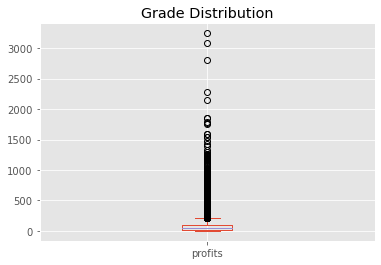

In [361]:
# Plot a box-whisker chart
df_stat['profits'].plot(kind='box', title='Grade Distribution')
plt.show()

In [362]:
# Create variable baru untuk define dataframe sales baru after outliers dikeluarkan
df_stat_xo = df_stat.copy()

In [363]:
# Define quartile untuk perhitungan IQR
quartiles = percentile(df_stat_xo['profits'], [25, 50, 75])

# Rumus IQR
IQR = quartiles[2] - quartiles[0]

# Define Upper_boundary & Lower_boundary
Upper_boundary = quartiles[2] + (IQR * 1.5)
Lower_boundary = quartiles[0] - (IQR * 1.5)

# Removing outliers from the data based on IQR ==> karena data tidak terdistribusi normal
df_stat_xo = df_stat_xo[(df_stat_xo["profits"] < Upper_boundary) & (df_stat_xo["profits"] > Lower_boundary)]

Tampak pada box chart bahwa terdapat data (outliers) yang terletak di luar rentang yang sudah ditentukan, ```yaitu Upper_boundary (Q3 + IQR x 1.5) dan Lower_boundary (Q1 - IQR x 1.5)```. Data outliers tersebut lah yg perlu kita hilangkan.

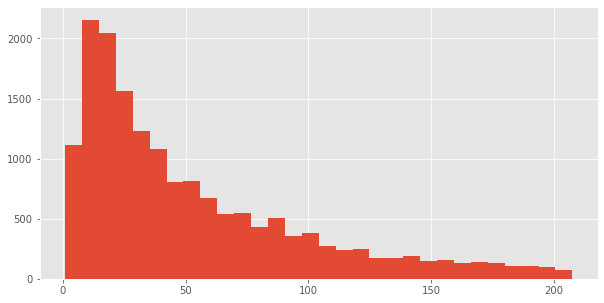

In [364]:
df_stat_xo['profits'].hist(bins=30, figsize=(10,5))
plt.show()

In [365]:
outliers_count = (df_stat['profits'].count() - df_stat_xo['profits'].count())/df_stat['profits'].count()
print(f'jumlah outliers adalah sebesar {outliers_count.round(3)*100} persen dari total data')

jumlah outliers adalah sebesar 9.1 persen dari total data


In [366]:
## Calculate quartiles
quartiles = percentile(df_stat_xo['profits'], [25, 50, 75])

print ('Count: ' + str(df_stat_xo['profits'].count()))
print ('Min: ' + str(df_stat_xo['profits'].min()))
print ('Max: ' + str(df_stat_xo['profits'].max()))
print ('Std: ' + str(df_stat_xo['profits'].std()))
print ('-'*20)
print ('Mean: ' + str(df_stat_xo['profits'].mean()))
print('Q1: %.3f' % quartiles[0])
print('Q2: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])


Count: 16630
Min: 0.8652299957279861
Max: 207.50300005450845
Std: 46.747628085400045
--------------------
Mean: 52.99264600966476
Q1: 17.447
Q2: 36.480
Q3: 75.068


After outliers telah dilakukan handling, distribusi data menjadi lebih baik

# F. Inferential stat : Hypothesis test

In [367]:
# Define Two samples
df_populasi = df_stat_xo.copy()
df_sample = df_stat_xo[df_stat_xo['created_at']>='2019-08-01'].copy()

OK, what we are going to do is, testing two data sample (population itself, and sample). Data yang kita define hanya meng-include-kan data STATUS ***RETURNED***, karena asumsi dugaan komplain merupakan root cause dari ketidakpuasan customer, (online buyers sekaligus kekhawatiran yang ditakutkan oleh CEO) atau dapat kita katakan ***PROFIT LOSS***. Sudah ada dua dataframe yg kita miliki,

```These are what we have now : df_populasi & df_sample, keduanya sudah bebas dari outliers.```

In [368]:
df_populasi['date'] = df_populasi['created_at'].dt.date
daily_profits_xo_p = df_populasi[['date','profits']].groupby('date').sum()
print('Average profits loss because of product rejection a Day (population): ${}'.format(np.round(daily_profits_xo_p['profits'].mean())))

df_sample['date'] = df_sample['created_at'].dt.date
daily_profits_xo_s = df_sample[['date','profits']].groupby('date').sum()
print('Average profits loss because of product rejection a Day (sample): ${}'.format(np.round(daily_profits_xo_s['profits'].mean())))

Average profits loss because of product rejection a Day (population): $728.0
Average profits loss because of product rejection a Day (sample): $796.0


In [369]:
# daily_profits_xo_p.to_csv("daily_profits_xo_p.csv")
# daily_profits_xo_s.to_csv("daily_profits_xo_s.csv")

***Two sample independent (one tailed test)***

Now, we want to check, ***whether Average profits a Day from population ($728) are significantly different or not from the sample data ($796)*** using Two Samples independent... set the significance level of 0.05

Hypothesis on this case :

**H0: μ_average profits loss = $728**<br>
**H1: μ_average profits loss != $728**

In [370]:
t_stat, p_val = stats.ttest_ind(daily_profits_xo_p,daily_profits_xo_s)
t_stat_p_val = stats.ttest_ind(daily_profits_xo_p,daily_profits_xo_s)
print('P-value:',p_val[0]) #two tail | the p-value is divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.03540318347980804
t-statistics: -2.104956252163932


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


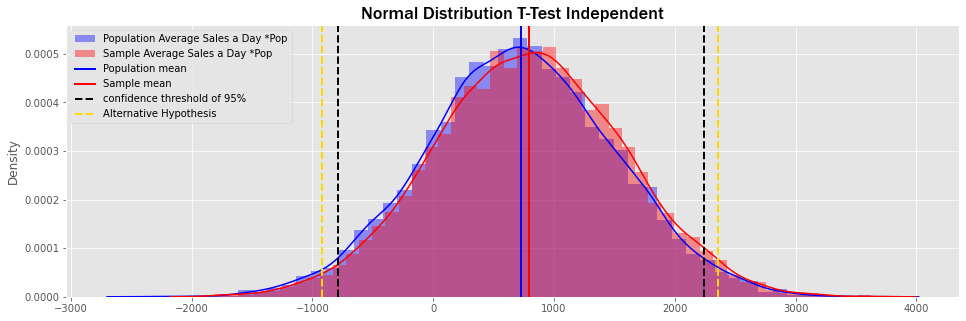

In [371]:
Population_pop = np.random.normal(daily_profits_xo_p.profits.mean(),daily_profits_xo_p.profits.std(),10000)
Sample_pop = np.random.normal(daily_profits_xo_s.profits.mean(),daily_profits_xo_s.profits.std(),10000)

ci = stats.norm.interval(0.95, daily_profits_xo_p.profits.mean(), daily_profits_xo_p.profits.std())
plt.figure(figsize=(16,5))
sns.distplot(Population_pop, label='Population Average Sales a Day *Pop',color='blue')
sns.distplot(Sample_pop, label='Sample Average Sales a Day *Pop',color='red')

plt.axvline(daily_profits_xo_p.profits.mean(), color='blue', linewidth=2, label='Population mean')
plt.axvline(daily_profits_xo_s.profits.mean(), color='red',  linewidth=2, label='Sample mean')

plt.axvline(ci[1], color='black', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='black', linestyle='dashed', linewidth=2)

plt.axvline(Population_pop.mean()+t_stat[0]*Population_pop.std(), color='gold', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Population_pop.mean()-t_stat[0]*Population_pop.std(), color='gold', linestyle='dashed', linewidth=2)

plt.title('Normal Distribution T-Test Independent', fontname='Franklin Gothic Medium', fontsize=18) # Adding Title
plt.legend(loc ="upper left", ncol=1) # Adding Legend setting

**Since our p-value is sligtly less than `0.05` (significant level), so we decide to reject the null hypothesis** and we can conclude that, in this case from the data after outliers is removed, profits loss is significantly increase. Everyting is totally OKe (based on rejection status) from the company is starting, 20th Jan 2019, but after the operational is running until Mid July 2019, the rejection status just keep increasing significantly which is not good.

# G. Conclusion

Uji Hipotesis sudah menunjukkan bahwa toko online The Look, khususnya CEO harus mulai membuat plan dan strategy baru yang bisa diterapkan secepat mungkin dalam memperbaiki performance pengiriman produk (returned product issue) yang mengakibatkan hilangnya opportunity profits dalam jumlah yang tidak kecil alias signifikan, dan hal ini sudah terjadi di tahun yg sama saat toko sudah berdiri, yaitu pada bulan juli 2019 (meskipun toko ini sudah berjalan semenjak awal tahun 2019 sd saat ini)... dengan kata lain, toko ini sudah kehilangan profits di tahun pertama beroperasi, that's too bad and unfortunate.

Oleh karena itu, ada beberapa indikasi yang bisa dilakukan dalam memperbaiki kondisi ini (sales profit loss due to product returned) di antaranya adalah selain memperbaiki kualitas pengiriman dan product (avoid product return), juga bisa diperbaiki dengan cara meningkatkan sales dan menurunkan biaya operasional (based on Data Visualization, etc).

Meningkatkan sales :
1. Approach more generation BB, karena user ini mendominasi profits generation
2. Improve shipping process to delivered, sehingga jumlah profits yang mengalir kepada Toko menjadi lbh sehat
3. Tingkatkan kualitas advertisement pada produk kategori dengan jumlah pembelian terbanyak
4. Berikan alternate/new business scheme pada produk yang hanya disukai salah satu gender saja
5. Kuatkan semua bisnis proses untuk optimasi penjualan kepada top 3 country
6. Opsi buka cabang di negara TOP 3 untuk mengurangi jumlah status pengiriman yang lbh cepat
7. Optimaze adds yang ada di website dan jaringan trafic source lainnya

Menurunkan biaya operasional :
1. Improve shipping business process until delivered (shipping partner, QA/QC review for product)
2. Develop SOP yang mengatur kualitas produk yang akan dikirimkan (decrease returned product)
3. Drop beberapa produk kategori yang sudah tidak diminati untuk optimisasi space & decrease maintenance cost
4. Merge beberapa distribution center yang berdekatan sehingga dapat dilakukan optimisasi manpower dan aset

Well, demikian alternatif strategy yang relefan dengan kondisi toko The Looks. CEO benar, untuk melihat ada sesuatu yang tidak beres di sistem penjualan dan operasional tokonya. Namun dengan kondisi seperti yang sudah dijabarkan sebelumnya, identifikasi kerugian dapat diatas dengan beberapa usulan strategy melalui peningkatan sales sekaligus penurunan biaya operasional.